In [2]:
# %matplotlib inline
# from matplotlib import style
# style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()


In [7]:
inspector=inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [8]:
for column in inspector.get_columns('measurement'):
    print("Column: %s" % column['name'])


Column: id
Column: station
Column: date
Column: prcp
Column: tobs


In [9]:
for column in inspector.get_columns('station'):
    print("Column: %s" % column['name'])



Column: id
Column: station
Column: name
Column: latitude
Column: longitude
Column: elevation


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
query="""
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date >= (
                SELECT
                   date(MAX(date), '-365 day')
                FROM
                    measurement)
        ORDER BY
            date


"""

In [12]:
df1=pd.read_sql(query,conn)


df1

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [13]:
df1["date"] = pd.to_datetime(df1["date"])

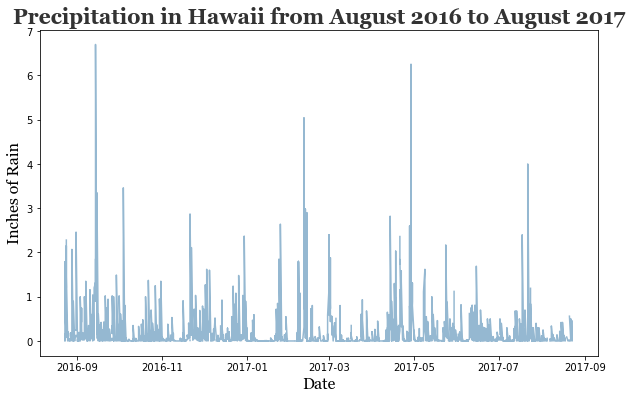

In [14]:

plt.figure(figsize=(10,6))
plt.plot(df1.date,df1.prcp, color="#95B8D1")

plt.title("Precipitation in Hawaii from August 2016 to August 2017", fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Date", fontsize=16,fontname="Georgia")
plt.ylabel("Inches of Rain", fontsize=16,fontname="Georgia")

plt.show()

In [15]:
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
query2="""
        SELECT
            count(*)
        FROM
            station


"""

In [17]:
df2=pd.read_sql(query2,conn)


df2.rename(columns = {'count(*)':'Total Number of Stations'}, inplace = True)
df2

,Total Number of Stations
0,9


In [18]:

query3 = """
        SELECT
            s.station,
            s.name,
            count(*) 
        FROM
            station s
        JOIN measurement m 
            on s.station = m.station
        GROUP BY 
            s.station
        ORDER BY
            count(*) desc
        """

In [19]:
# List the stations and the counts in descending order.
conn = engine.connect()
df3=pd.read_sql(query3,conn)


df3.rename(columns = {'count(*)':'Total Number of Observations'}, inplace = True)
df3

,station,name,Total Number of Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [20]:
#What are the most active stations? (i.e. what stations have the most rows)?

mostactive=df3["Total Number of Observations"].max()

mask=df3["Total Number of Observations"]==mostactive
name=df3.loc[mask]
name



,station,name,Total Number of Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query_active= """
            SELECT
                station,
                date,
                tobs
            FROM
                measurement
            WHERE
                station='USC00519281'
            ORDER BY
                tobs desc
        """

In [22]:
# query_test= """
#             SELECT
#                 station,
#                 date,
#                 tobs
#             FROM
#                 measurement
#         """

In [29]:
# df_test=pd.read_sql(query_active,conn)
# df_test


,station,date,tobs
0,USC00519281,2015-09-10,85.0
1,USC00519281,2015-09-09,84.0
2,USC00519281,2015-07-18,83.0
3,USC00519281,2015-09-05,83.0
4,USC00519281,2017-08-06,83.0
...,...,...,...
2767,USC00519281,2015-01-05,56.0
2768,USC00519281,2015-02-15,56.0
2769,USC00519281,2015-03-13,56.0
2770,USC00519281,2016-02-08,56.0


In [31]:
# start="2015-09-10"
# temp=df_test.loc[df_test.date==start,"tobs"]
# temp

0    85.0
Name: tobs, dtype: float64

In [52]:
# dates=df_test.loc[df_test.date>=start]
# list=[]
# for x in dates:
#     list=[]
#     Tmean=dates.tobs.mean()
#     Tmin=dates.tobs.min()
#     Tmax=dates.tobs.max()
#     list.append(Tmean)
#     list.append(Tmin)
#     list.append(Tmax)


# print(list)

[73.03719599427754, 56.0, 85.0]


In [21]:
df_active=pd.read_sql(query_active,conn)
df_active

,station,date,tobs
0,USC00519281,2015-09-10,85.0
1,USC00519281,2015-09-09,84.0
2,USC00519281,2015-07-18,83.0
3,USC00519281,2015-09-05,83.0
4,USC00519281,2017-08-06,83.0
...,...,...,...
2767,USC00519281,2015-01-05,56.0
2768,USC00519281,2015-02-15,56.0
2769,USC00519281,2015-03-13,56.0
2770,USC00519281,2016-02-08,56.0


In [22]:
highest_temp=df_active.tobs.max()
lowest_temp=df_active.tobs.min()
average_temp=df_active.tobs.mean()

print(f"the lowest temp observation in the most active station is {lowest_temp}, the highest is {highest_temp} and the average temp is {average_temp}" )

the lowest temp observation in the most active station is 54.0, the highest is 85.0 and the average temp is 71.66378066378067


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


query4 = """
        SELECT
            s.station,
            s.name,
            m.tobs,
            m.date
        FROM
            station s
        JOIN measurement m 
            on s.station = m.station
        WHERE
            date >= (
                        SELECT
                           date(MAX(date), '-365 day')
                        FROM
                            measurement)
        ORDER BY
            date
        
        """



In [24]:
df4=pd.read_sql(query4,conn)

df4["date"] = pd.to_datetime(df4["date"])


df4

,station,name,tobs,date
0,USC00519397,"WAIKIKI 717.2, HI US",81.0,2016-08-23
1,USC00513117,"KANEOHE 838.1, HI US",76.0,2016-08-23
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",80.0,2016-08-23
3,USC00517948,"PEARL CITY, HI US",80.0,2016-08-23
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",80.0,2016-08-23
...,...,...,...,...
2225,USC00516128,"MANOA LYON ARBO 785.2, HI US",76.0,2017-08-22
2226,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-23
2227,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",82.0,2017-08-23
2228,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",82.0,2017-08-23


In [25]:
most_temp_observations=df4.station.value_counts()
print(most_temp_observations)
station_needed=most_temp_observations.index[0]
print(station_needed)

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64
USC00519397


In [26]:
most_active_df=df4.loc[df4.station==station_needed].reset_index(drop=True)
most_active_df

,station,name,tobs,date
0,USC00519397,"WAIKIKI 717.2, HI US",81.0,2016-08-23
1,USC00519397,"WAIKIKI 717.2, HI US",79.0,2016-08-24
2,USC00519397,"WAIKIKI 717.2, HI US",80.0,2016-08-25
3,USC00519397,"WAIKIKI 717.2, HI US",79.0,2016-08-26
4,USC00519397,"WAIKIKI 717.2, HI US",77.0,2016-08-27
...,...,...,...,...
356,USC00519397,"WAIKIKI 717.2, HI US",79.0,2017-08-19
357,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-20
358,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-21
359,USC00519397,"WAIKIKI 717.2, HI US",82.0,2017-08-22


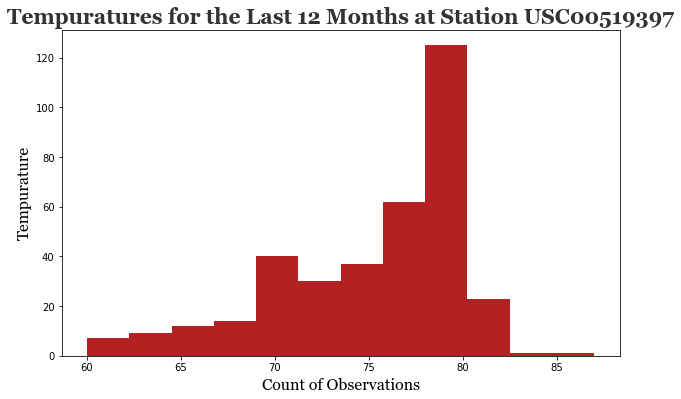

In [27]:
plt.figure(figsize=(10,6))
plt.hist(most_active_df.tobs, bins=12, color="firebrick")

plt.title((f"Tempuratures for the Last 12 Months at Station {station_needed}"), fontsize=21,fontweight='bold',fontname="Georgia",color="#333333")
plt.xlabel("Count of Observations", fontsize=16,fontname="Georgia")
plt.ylabel("Tempurature", fontsize=16,fontname="Georgia")

plt.show()